## Tree-Based Regression Methods for 3D Sinusoidal Data

## Overview

The main purpose of this project is to use tree-based methods to solve a regression problem.  In this project, we will fit a `Gradient-Boosted Regression Tree`, a `Random Forest`, and a `Decision Tree` to a noisy 3D sinusoidal data set.  Since these models can be trained very quickly on the supplied data, we will first manually adjust hyperparameter values and observe their influence on the model's predictions. Next, in this project, we will perform several grid searches, and visualize model predictions for the optimal `Gradient-Boosted Regression Tree`, a `Random Forest`, and `Decision Tree` models that were determined by the grid searches. Finally we will compute the generalization error on the test set for the three models.

## Preliminaries

Let's import some common packages:

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot3Ddata(data_df):
    x = data_df['x']
    y = data_df['y']
    z = data_df['z']
    
    fig = plt.figure(figsize=(14, 14))
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    ax_00 = fig.add_subplot(spec[0, 0], projection='3d')
    ax_01 = fig.add_subplot(spec[0, 1], projection='3d')
    ax_10 = fig.add_subplot(spec[1, 0], projection='3d')
    ax_11 = fig.add_subplot(spec[1, 1], projection='3d')
    
    axs = [ax_00, ax_01, ax_10, ax_11]
    for ax in axs:
        ax.set_xlim(0, 14)
        ax.set_xticks(list(range(0, 16, 2)))
        ax.set_xlabel('x', c='r', fontname='serif')

        ax.set_ylim(-6, 6)
        ax.set_yticks(list(range(-6, 8, 2)))
        ax.set_ylabel('y', c='r', fontname='serif')


        ax.set_zlim(0, 8.5)
        ax.set_zticks(list(range(0, 10, 2)))
        ax.set_zlabel('z', c='r', fontname='serif')
    
        ax.scatter3D(x, y, z)
    
    ax_00.view_init(0, 90)
    ax_01.view_init(45, 0)
    ax_10.view_init(45, 45)
    ax_11.view_init(30, 30)
    
    return axs
    
def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
    data_pts = np.array([scat_x, scat_y, scat_z]).T
    data_df = pd.DataFrame(data_pts, columns=['x', 'y', 'z'])
    axs = plot3Ddata(data_df)
    
    for ax in axs:
        ax.plot3D(fit_x, fit_y, fit_z, 'r')

# Import and Split Data

In [29]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('3DSinusoidal.csv')

X = data[['x', 'y']]
z = data[['z']]

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=.2, random_state=42)

In [3]:
#calculating the endpoints of train data, to make a grid for later predictions and plotting
x_min, y_min = X_train.min().round(3)
z_min = z_train.min().round(3)

x_max, y_max = X_train.max().round(3)
z_max = z_train.max().round(3)

xy_train = np.mgrid[x_min:x_max:10j, y_min:y_max:10j].reshape(2, -1).T
fit_x = xy_train[:, 0]
fit_y = xy_train[:, 1]

# Plot Data

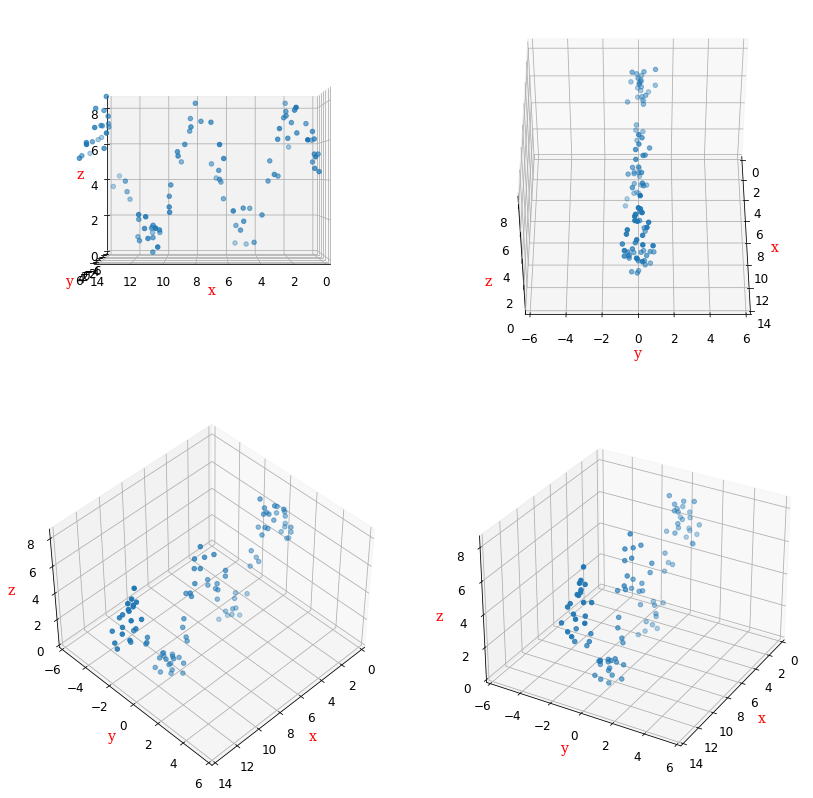

In [4]:
train_df = pd.concat([X_train, z_train], axis=1)
plot3Ddata(train_df);

# Explore 3D Data: GradientBoostingRegressor

We fit a `GradientBoostingRegressor` model to this data. We manually assign values to the following hyperparameters.  We "play around" by using different combinations of hyperparameter values to get a feel for how they affect the model's predictions.

 - `learning_rate = 0.5`
 - `max_depth = 16`
 - `n_estimators = 100`
 - `random_state = 42`

In [5]:
#casting train values into numpy arrays
X_train = X_train.values
z_train = z_train.values.ravel()

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
gboost_reg = GradientBoostingRegressor(learning_rate=.5, 
                                       max_depth=16, 
                                       n_estimators=100, 
                                       random_state=42)
gboost_reg.fit(X_train, z_train)
fit_z = gboost_reg.predict(xy_train)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

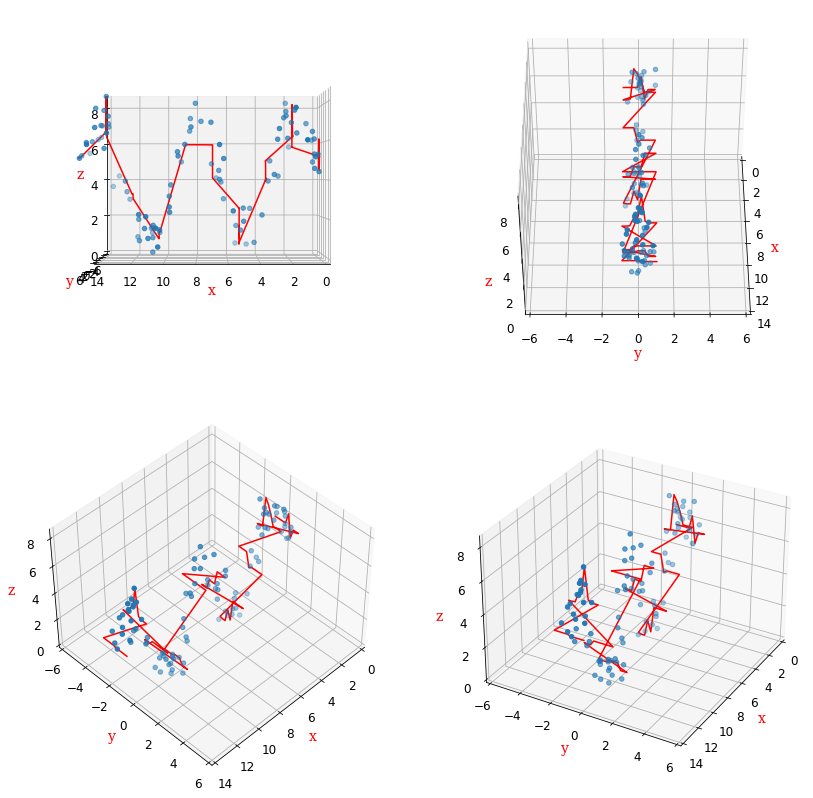

In [7]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x=X_train[:, 0], scat_y=X_train[:, 1], scat_z=z_train);

# Explore 3D Data: RandomForestRegressor

We fit a `RandomForestRegressor` model to this data.  We manually assign values to the following hyperparameters.  We "play around" by using different combinations of hyperparameter values to get a feel for how they affect the model's predictions.

 - `min_samples_split = 4`
 - `max_depth = 32`
 - `n_estimators = 10`
 - `random_state = 42`

In [8]:
from sklearn.ensemble import RandomForestRegressor

randForest_reg = RandomForestRegressor(n_estimators=10, 
                                       min_samples_split=4,
                                       max_depth=32,
                                       random_state=42)

randForest_reg.fit(X_train, z_train)
fit_z = randForest_reg.predict(xy_train)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

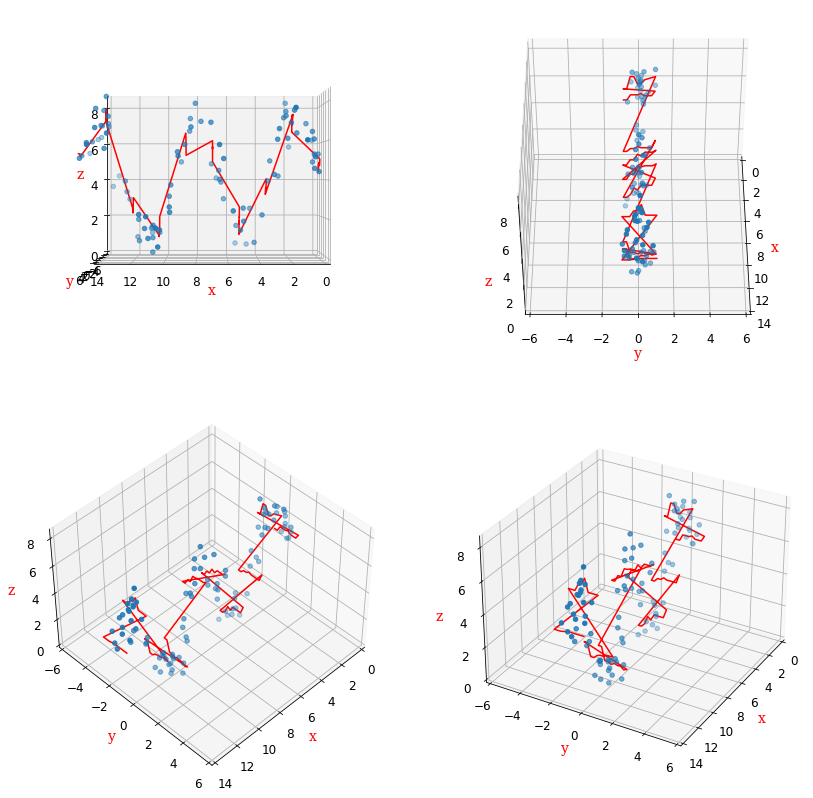

In [9]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x=X_train[:, 0], scat_y=X_train[:, 1], scat_z=z_train);

# Explore 3D Data: DecisionTreeRegressor

We fit a `DecisionTreeRegressor` model to this data. We manually assign values to the following hyperparameters.  We "play around" by using different combinations of hyperparameter values to get a feel for how they affect the model's predictions.  

 - `splitter = best`
 - `max_depth = 16`
 - `min_samples_split = 12`
 - `random_state = 42`

In [10]:
from sklearn.tree import DecisionTreeRegressor

dtree_reg = DecisionTreeRegressor(splitter="best",
                                  max_depth=16,
                                  min_samples_split=12)

dtree_reg.fit(X_train, z_train)
fit_z = dtree_reg.predict(xy_train)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

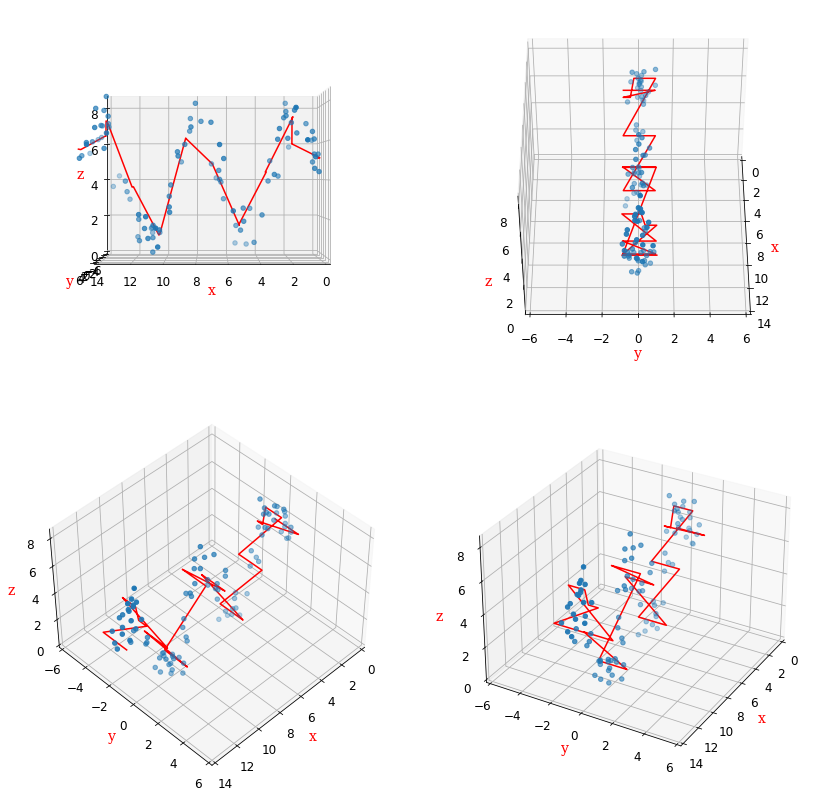

In [11]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x=X_train[:, 0], scat_y=X_train[:, 1], scat_z=z_train);

# Perform Grid Searches

We perform a series of grid searches, which will yield the optimal hyperparamter values for each of the three model types.

We first perform a course-grained grid search, with a very broad range of values first.  Then, we perform a second grid search using a tighter range of values centered on those identified in the first grid search. We may have to use another round of grid searching too.


   GradientBoostingRegressor:
    
     - `max_depth = up to 32`
     - `n_estimators = up to 1000`
     - `learning_rate = from .01 to 1`

   RandomForestRegressor:
    
     - `max_depth = up to 32`
     - `n_estimators = up to 1000`
     - `min_samples_split = up to 20`

   DecisionTreeRegressor:
    
     - `splitter = ["best", "random"]`
     - `max_depth = up to 32`
     - `min_samples_split = up to 20`  


## Perform Individual Model Grid Searches

In this section we perform a series of grid searches to compute the optimal hyperparameter values for each of the three model types.

In [12]:
from sklearn.model_selection import GridSearchCV
# -----
# Coarse-Grained GradientBoostingRegressor GridSearch
# -----

from sklearn.model_selection import GridSearchCV

gboost_coarse_grid = {'max_depth':[2, 4, 8, 16, 32],
                      'n_estimators':[10, 100, 250, 500, 750, 1000],
                      'learning_rate':[.01, .05, .1, .5, 1]}

gboost_coarse_reg = GridSearchCV(GradientBoostingRegressor(random_state=42), gboost_coarse_grid, verbose=1, cv=3)
gboost_coarse_reg.fit(X_train, z_train)

print("The best parameters are: ", gboost_coarse_reg.best_params_)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
The best parameters are:  {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 10}


In [13]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

gboost_fine_grid = {'max_depth':[3, 4, 6],
                    'n_estimators':[5, 10, 25, 50, 75],
                    'learning_rate':[.2, .25, .4, .5, .6, .75]}

gboost_fine_reg = GridSearchCV(GradientBoostingRegressor(random_state=42), gboost_fine_grid, verbose=1, cv=3)
gboost_fine_reg.fit(X_train, z_train)

print("The best parameters are: ", gboost_fine_reg.best_params_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
The best parameters are:  {'learning_rate': 0.25, 'max_depth': 4, 'n_estimators': 25}


In [14]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

gboost_final_grid = {'max_depth':[4, 5],
                    'n_estimators':[15, 20, 25, 30, 35, 40],
                    'learning_rate':[.21, .23, .25, .27, .3]}

gboost_final_reg = GridSearchCV(GradientBoostingRegressor(random_state=42), gboost_final_grid, verbose=1, cv=3)
gboost_final_reg.fit(X_train, z_train)

print("The best parameters are: ", gboost_final_reg.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
The best parameters are:  {'learning_rate': 0.27, 'max_depth': 4, 'n_estimators': 25}


On this dataset, the optimal model parameters for the `GradientBoostingRegressor` class are:

- `learning_rate = 0.27`
- `max_depth = 4`
- `n_estimators = 25`

In [15]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

randForest_coarse_grid = {'max_depth':[2, 4, 8, 16, 32],
                          'n_estimators':[10, 100, 250, 500, 750, 1000],
                          'min_samples_split':[4, 8, 12, 16, 20]}

randForest_coarse_reg = GridSearchCV(RandomForestRegressor(random_state=42), 
                                      randForest_coarse_grid, verbose=1, cv=3)
randForest_coarse_reg.fit(X_train, z_train)

print("The best parameters are: ", randForest_coarse_reg.best_params_)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
The best parameters are:  {'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 250}


In [16]:
# -----
# Refined RandomForestRegressor GridSearch
# -----

randForest_fine_grid = {'max_depth':[6, 8, 10, 12, 14],
                        'n_estimators':[200, 250, 300, 350, 400],
                        'min_samples_split':[2, 4, 6]}

randForest_fine_reg = GridSearchCV(RandomForestRegressor(random_state=42), randForest_fine_grid, verbose=1, cv=3)
randForest_fine_reg.fit(X_train, z_train)

print("The best parameters are: ", randForest_fine_reg.best_params_)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
The best parameters are:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 250}


In [17]:
# -----
# Final RandomForestRegressor GridSearch
# -----

randForest_final_grid = {'max_depth':[9, 10, 11],
                         'n_estimators':[225, 250, 275],
                         'min_samples_split':[2, 3]}

randForest_final_reg = GridSearchCV(RandomForestRegressor(random_state=42), randForest_final_grid, verbose=1, cv=3)
randForest_final_reg.fit(X_train, z_train)

print("The best parameters are: ", randForest_final_reg.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
The best parameters are:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 250}


On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `max_depth = 10`
- `n_estimators = 250`
- `min_samples_split = 2`

In [18]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

dtree_coarse_grid = {'splitter':['best', 'random'],
                     'max_depth':[2, 4, 8, 16, 32],
                     'min_samples_split':[4, 8, 12, 16, 20]}

dtree_coarse_reg = GridSearchCV(DecisionTreeRegressor(random_state=42), dtree_coarse_grid, verbose=1, cv=3)
dtree_coarse_reg.fit(X_train, z_train)

print("The best parameters are: ", dtree_coarse_reg.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
The best parameters are:  {'max_depth': 8, 'min_samples_split': 4, 'splitter': 'best'}


In [19]:
# -----
# Final-Grained DecisionTreeRegressor GridSearch
# -----

dtree_fine_grid = {'splitter':['best'],
                   'max_depth':list(range(5, 16)),
                   'min_samples_split':list(range(2, 8))}

dtree_fine_reg = GridSearchCV(DecisionTreeRegressor(random_state=42), dtree_fine_grid, verbose=1, cv=3)
dtree_fine_reg.fit(X_train, z_train)

print("The best parameters are: ", dtree_fine_reg.best_params_)

Fitting 3 folds for each of 66 candidates, totalling 198 fits
The best parameters are:  {'max_depth': 5, 'min_samples_split': 7, 'splitter': 'best'}


On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `splitter = best`
- `max_depth = 5`
- `min_samples_split = 7`

# Visualize Optimal Model Predictions

In the previous section we performed a series of grid searches designed to identify the optimal hyperparameter values for all three models.  Now, we use the `best_params_` attribute of the grid search objects from above to create the three optimal models below.  For each model, we visualize the models predictions on the training set - this is what we mean by the "prediction curve" of the model.

### Create Optimal GradientBoostingRegressor Model

In [20]:
gboost_opt = GradientBoostingRegressor(learning_rate=.27, max_depth=4, n_estimators=25, random_state=42)
gboost_opt.fit(X_train, z_train)
fit_z = gboost_opt.predict(xy_train)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

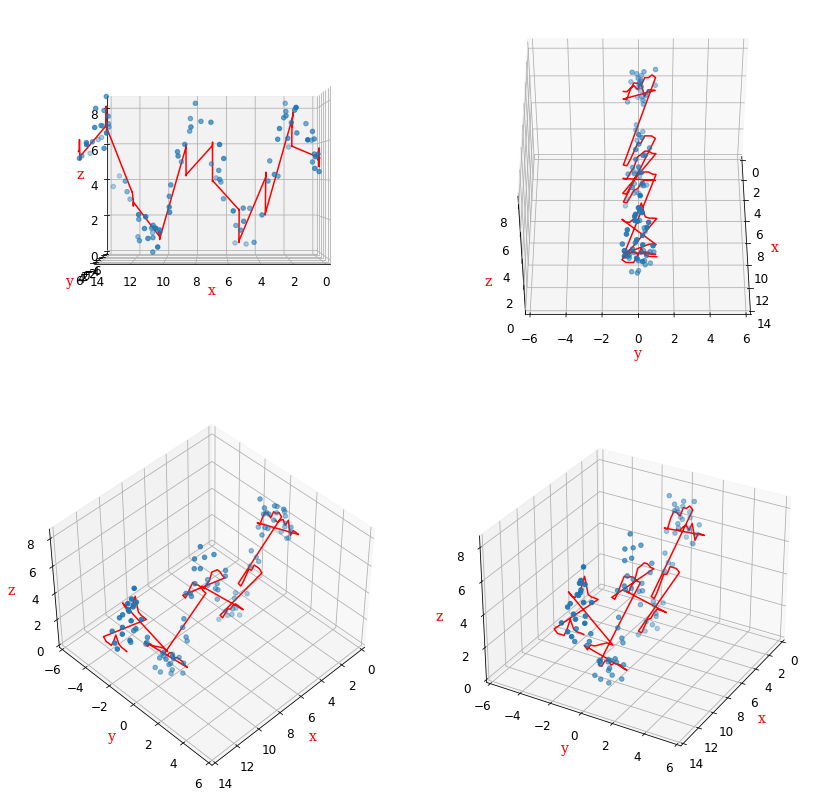

In [21]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x=X_train[:, 0], scat_y=X_train[:, 1], scat_z=z_train);

### Create Optimal RandomForestRegressor Model

In [22]:
randForest_opt = RandomForestRegressor(n_estimators=250, max_depth=10, min_samples_split=2, random_state=42)
randForest_opt.fit(X_train, z_train)
fit_z = randForest_opt.predict(xy_train)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

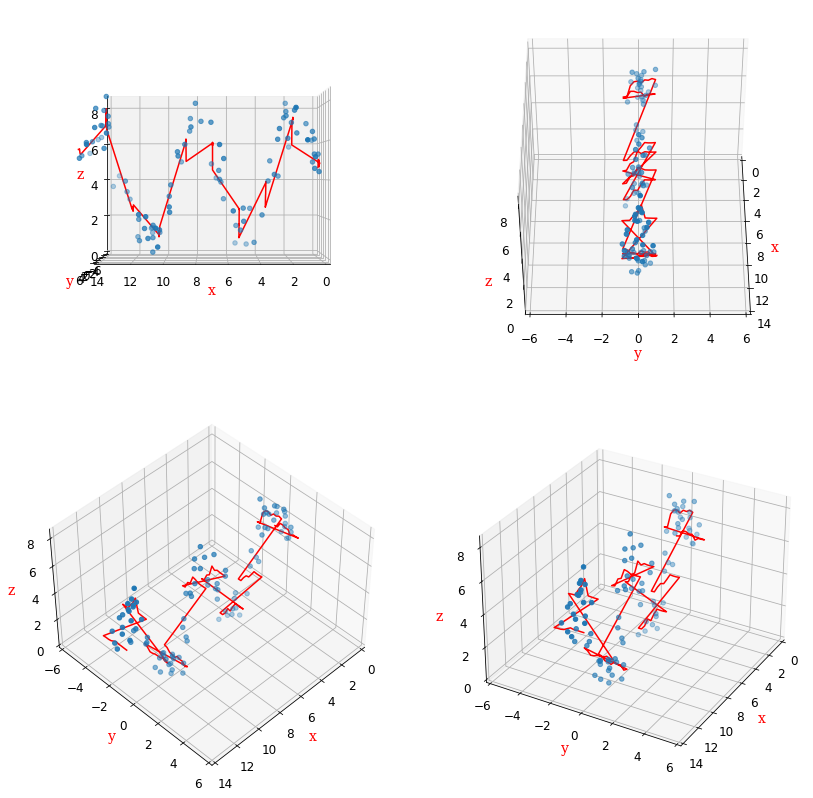

In [23]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x=X_train[:, 0], scat_y=X_train[:, 1], scat_z=z_train)

### Create Optimal DecisionTreeRegressor Model

In [24]:
dtree_opt = DecisionTreeRegressor(splitter='best', max_depth=5, min_samples_split=7, random_state=42)
dtree_opt.fit(X_train, z_train)
fit_z = dtree_opt.predict(xy_train)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

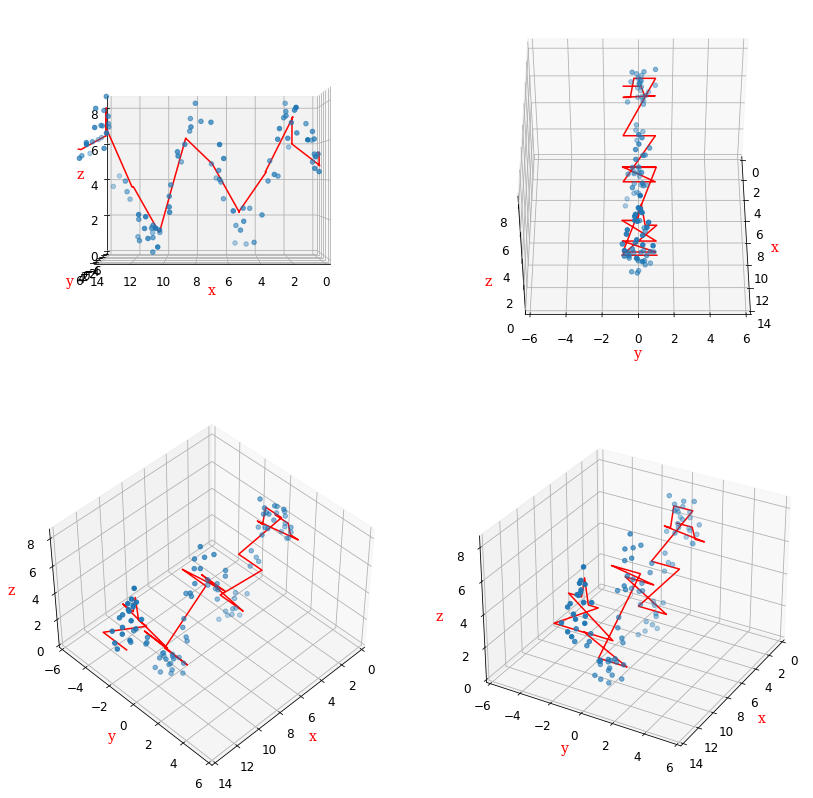

In [25]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x=X_train[:, 0], scat_y=X_train[:, 1], scat_z=z_train)

# Compute Generalization Error

In [35]:
#casting test values into numpy arrays
X_test = X_test.values
z_test = z_test.values.ravel()

In [27]:
from sklearn.metrics import mean_squared_error 

#Gradient Boost prediction
z_pred_gboost = gboost_opt.predict(X_test)
mse_gboost = mean_squared_error(z_test, z_pred_gboost)
print("MSE for Gradient Boost Regressor:", round(mse_gboost, 4))

#Random Forest prediction
z_pred_randForest = randForest_opt.predict(X_test)
mse_randForest = mean_squared_error(z_test, z_pred_randForest)
print("MSE for Random Forest Regressor:", round(mse_randForest, 4))

#Decision Tree prediction
z_pred_dtree = dtree_opt.predict(X_test)
mse_dtree = mean_squared_error(z_test, z_pred_dtree)
print("MSE for Random Forest Regressor:", round(mse_dtree, 4))

MSE for Gradient Boost Regressor: 0.6597
MSE for Random Forest Regressor: 0.5508
MSE for Random Forest Regressor: 0.8234


In [42]:
#calculating the endpoints of train data, to make a grid for later predictions and plotting
x_min = X_test[:,0].min().round(3)
y_min = X_test[:,1].min().round(3)
z_min = z_test.min().round(3)

x_max = X_test[:,0].max().round(3)
y_max = X_test[:,1].max().round(3)
z_max = z_test.min().round(3)

xy_test = np.mgrid[x_min:x_max:10j, y_min:y_max:10j].reshape(2, -1).T
fit_x = xy_test[:, 0]
fit_y = xy_test[:, 1]

### Plotting the test set against the prediction curve

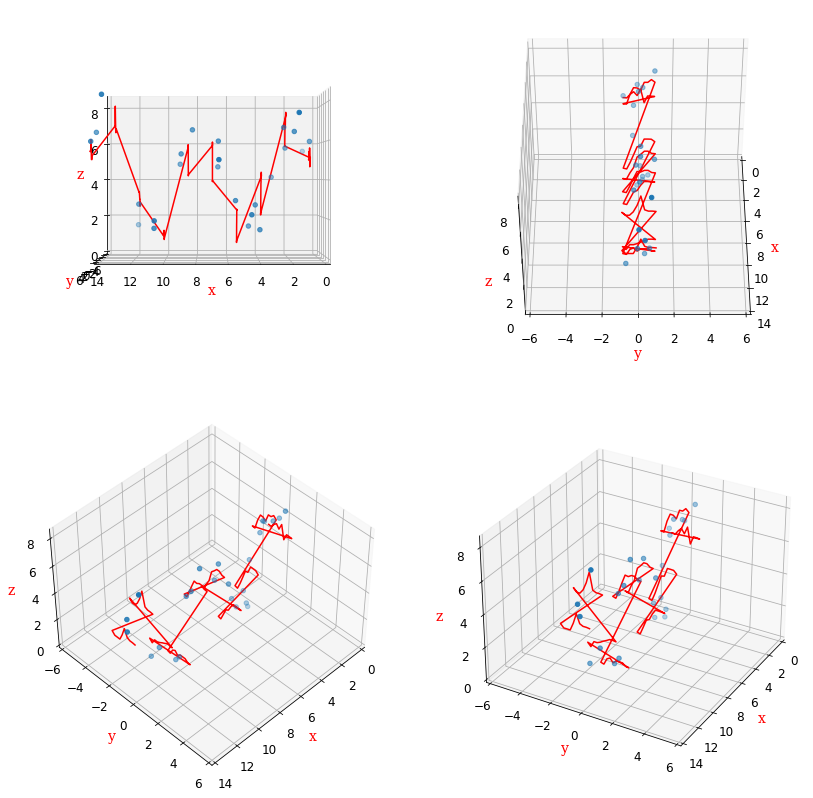

In [43]:
fit_z = gboost_opt.predict(xy_train)
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x=X_test[:, 0], scat_y=X_test[:, 1], scat_z=z_test)

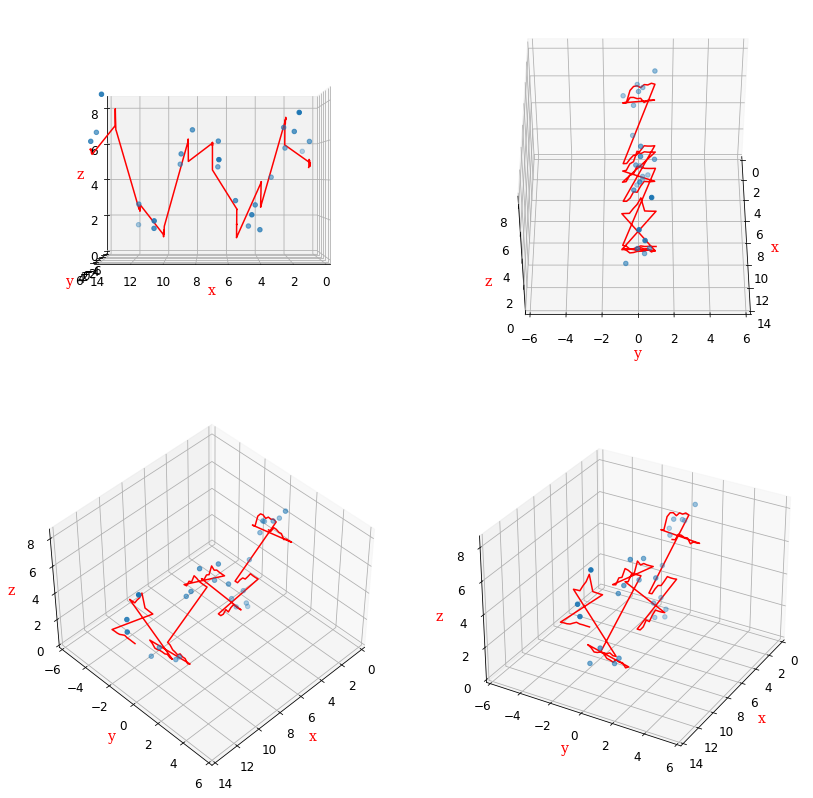

In [38]:
fit_z = randForest_opt.predict(xy_train)
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x=X_test[:, 0], scat_y=X_test[:, 1], scat_z=z_test)

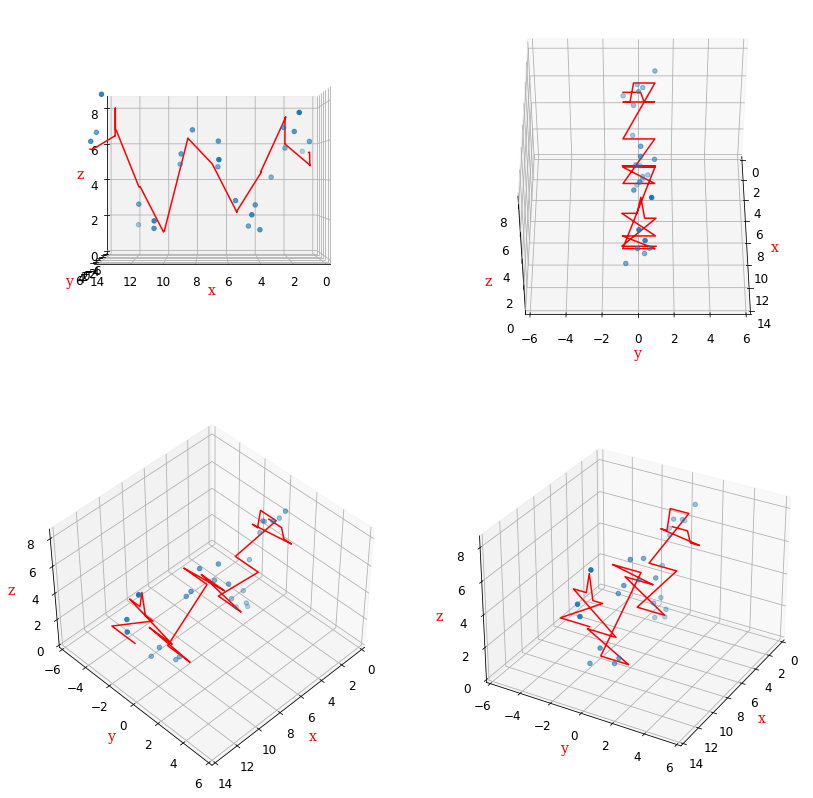

In [39]:
fit_z = dtree_opt.predict(xy_train)
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x=X_test[:, 0], scat_y=X_test[:, 1], scat_z=z_test)